# Titanic - Exploración de datos

El objetivo del siguiente notebook es hacer una exploración de los datos del Dataset del Titanic ("titanic.csv").

Pueden encontrar más información al respecto en el siguiente link:

https://www.kaggle.com/c/titanic

Kaggle una página donde se suben Dataset y la gente los analiza. En general los datasets están bastante curados y la gente sube los "Kernels" (Notebooks) que usaron para analizarlos. La página está buenísima, si pueden exploren los kernels de análisis del Titanic - al menos los de mayor puntaje - y miren las competencias que hay.




### 1. Cargamos las librerías y los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# Leemos el archivo .CSV y lo guardamos en un Dataframe.

df = pd.read_csv('titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Diccionario del datset Titanic:

`PassengerId`: identificador único para cada pasajero.

`Survived`: La etiqueta que indica si el pasajero sobrevivió o no (0 = no sobrevivió, 1 = sobrevivió).

`Pclass`: La clase del boleto del pasajero, representando su clase de cabina (1 = primera clase, 2 = segunda clase, 3 = tercera clase).

`Name`: El nombre completo del pasajero.

`Sex`: El sexo del pasajero (masculino o femenino).

`Age`: La edad del pasajero en años.

`SibSp`: El número de hermanos o esposos que viajaban con el pasajero en el mismo barco.

`Parch`: El número de padres o hijos que viajaban con el pasajero.

`Ticket`: El número de boleto del pasajero.

`Fare`: El precio que el pasajero pagó por su boleto.

`Cabin`: El número de la cabina en la que viajaba el pasajero. Muchos valores son NaN, ya que no todos los pasajeros tenían una cabina asignada.

`Embarked`: El puerto de embarque del pasajero:

              C: Cherbourg
              Q: Queenstown
              S: Southampton

In [3]:
# Cuantas Filas y Columnas tiene el Dataset?
print(df.shape)

(891, 12)


Es decir, tiene 891 entradas y 12 features o variables.



In [4]:
# ¿Qué forma tiene el dataset? Hacer una descripción rápida

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# ¿De qué tipo son las variables y qué valores toman?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# ¿Cuántos valores faltantes hay en cada columna?

df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
# ¿Cuál o cuáles son las columnas con más valores faltantes?

df.isna().sum(axis = 0).idxmax()

'Cabin'

### **Hacer un gráfico donde se puedan observar las relaciones entre variables y sus histogramas**

¿Qué hace sns.pairplot(df)?

pairplot genera una **matriz de gráficos** que muestra:

    Diagramas de dispersión (scatter plots) entre todas las combinaciones de variables numéricas del DataFrame.

    Histogramas o KDEs (curvas de densidad) en la diagonal principal, que muestran la distribución individual de cada variable.

 **sns.pairplot(df)** solo trabaja con variables numéricas, porque su objetivo es graficar relaciones cuantitativas entre columnas   

¿Cómo son las distribuciones y las relaciones entre variables?

¿Son informativos estos gráficos?

Concentrarse en las variables más relevantes: género, edad, clase, etc.

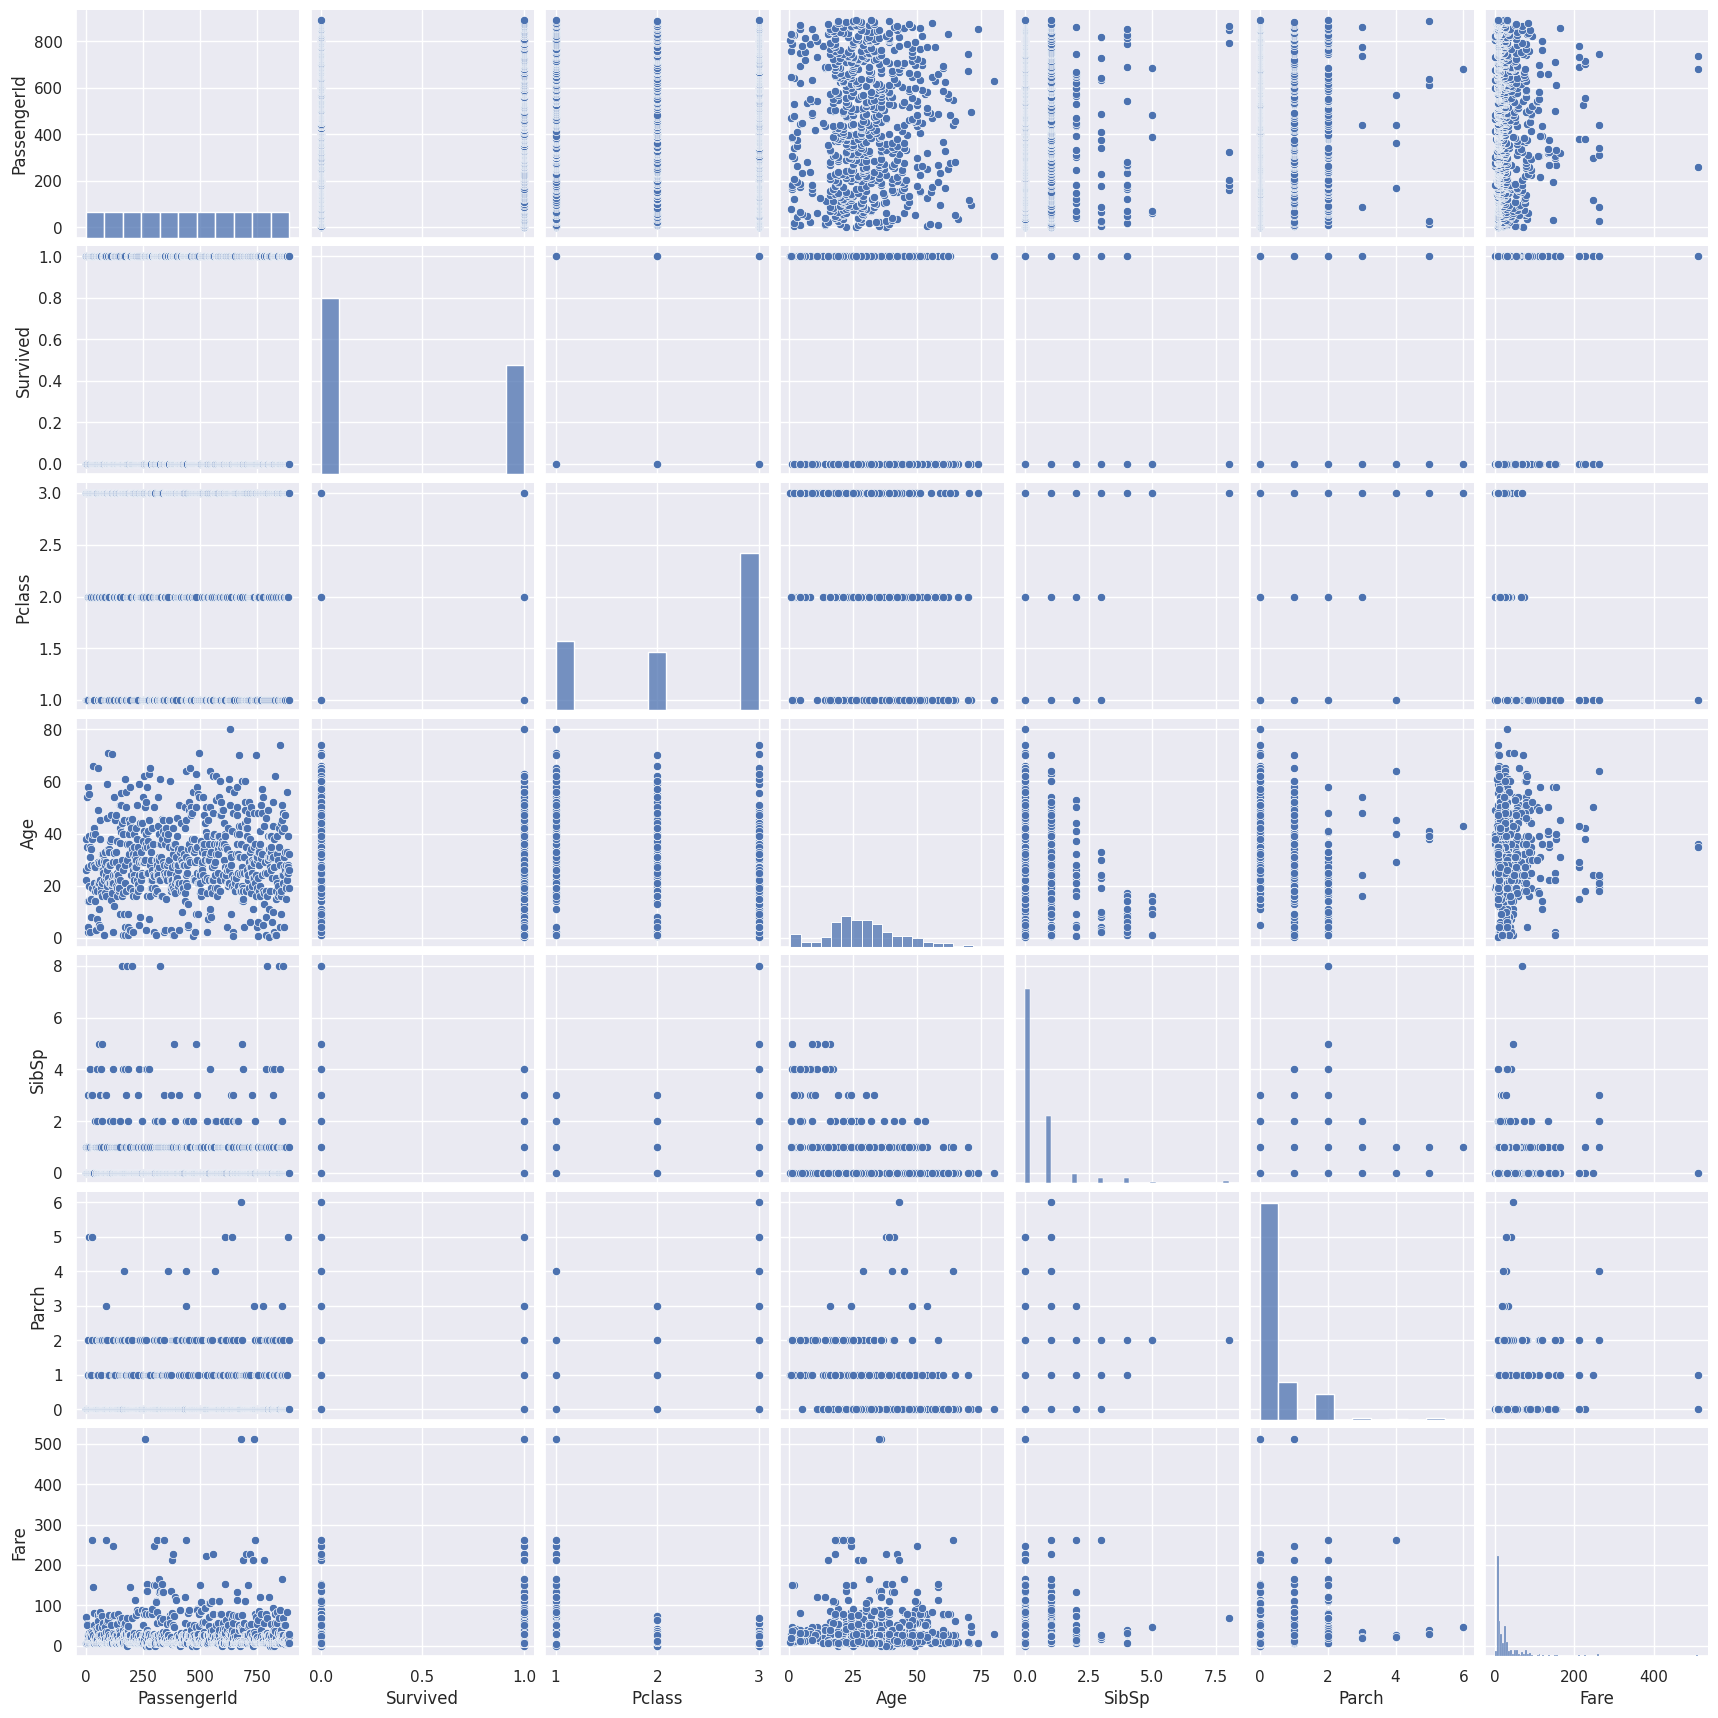

In [11]:
sns.pairplot(df)

## Pandas también tiene una función incorporada similar a `sns.pairplot()`

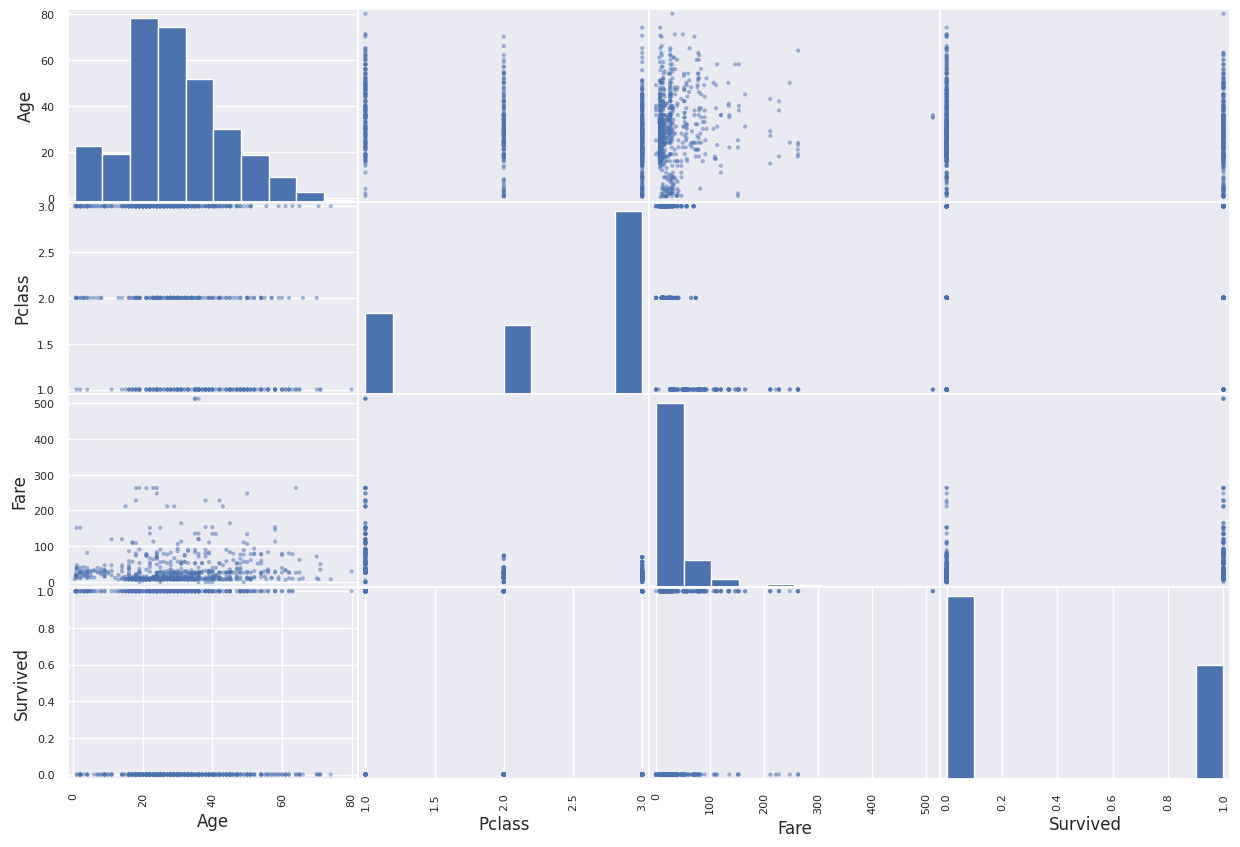

In [10]:
# pd.plotting.scatter_matrix(df,figsize = (15,10))
pd.plotting.scatter_matrix(df[['Sex', 'Age', 'Pclass', 'Fare', 'Survived']],figsize = (15,10))
plt.show()

## Distribuciones de algunas variables que nos pueden interesar



**1 - Distribucion de género**

Elegimos usar `sns.countplot` pero no es la única opción.

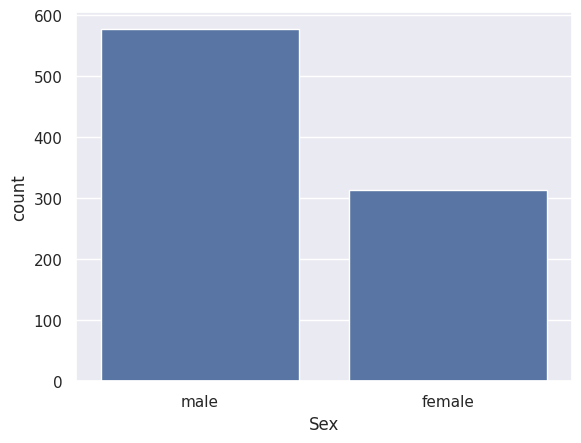

In [9]:
# Para contar y graficar la cantidad de pasajeros por sexo

sns.countplot(x='Sex', data=df) #equivelante a sns.countplot(df.Sex)
plt.show()

countplot crea una gráfica de barras donde:

    El eje X muestra las categorías (en este caso, 'male' y 'female').

    El eje Y muestra la cantidad de registros para cada categoría.

Perfecto para ver el balance de clases en variables categóricas.

**2 - Distribucion de edades**

Hacemos un histograma, ya que los valores que puede tomar esta variable es mucho mayor que para género o clase, por mencionar dos.

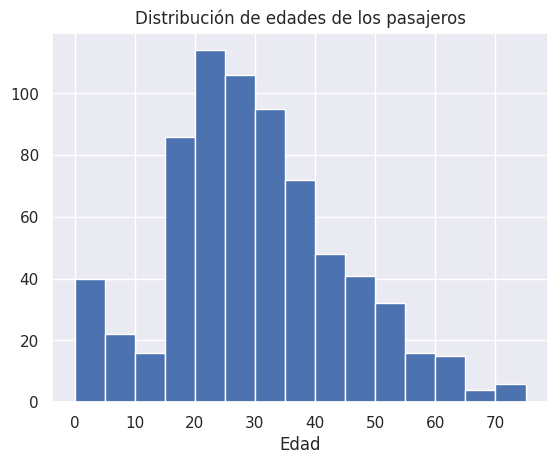

In [8]:
# generamos un histograma de edades de los pasajeros del Titanic

df.Age.hist(bins = np.arange(0,80,5))                   # sintaxis: np.arange(inicio, fin, paso)
plt.xlabel('Edad')
# plt.savefig('distribucion_edades.png', dpi = 300)
plt.title('Distribución de edades de los pasajeros')
plt.show()

**3 - Distribucion de pasajeros por clases**

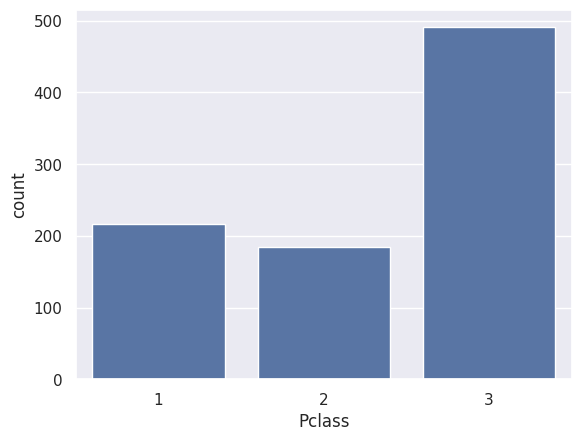

In [14]:
sns.countplot(x="Pclass", data=df)
plt.show()

**4 - Distribucion de las tarifas pagadas**

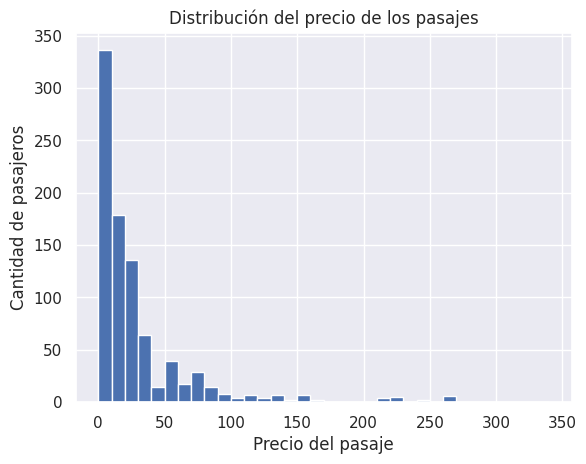

In [16]:
df.Fare.hist(bins = np.arange(0,350,10))
plt.xlabel('Precio del pasaje')
plt.ylabel('Cantidad de pasajeros')
plt.title('Distribución del precio de los pasajes')
plt.show()

**5 - Supervivencia**

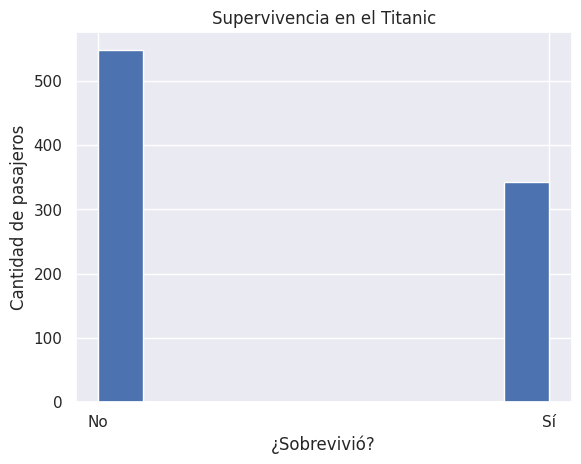

In [18]:
# genera un histograma simple que muestra cuántas personas sobrevivieron y cuántas no en el Titanic

df.Survived.hist()
plt.xticks([0, 1], ['No', 'Sí'])  # Cambia 0 y 1 por texto
plt.xlabel('¿Sobrevivió?')
plt.ylabel('Cantidad de pasajeros')
plt.title('Supervivencia en el Titanic')
plt.show()


# 0 → No sobrevivió
# 1 → Sobrevivió

## 2. Extrayendo información

"Mujeres y niños primero". ¿Será cierto? Tratemos de graficar la supervivencia discrimando por edad y género.

En general, un paso inicial para estudiar el efecto de una variable - en este caso, *género* y *edad* - sobre otra variable - en este caso, *supervivencia* - es desagregar los gráficos de acuerdo a aquellas variables.

**Género**: empezamos por género. Para eso, tratamos de graficar la supervivencia separando hombres y mujeres.

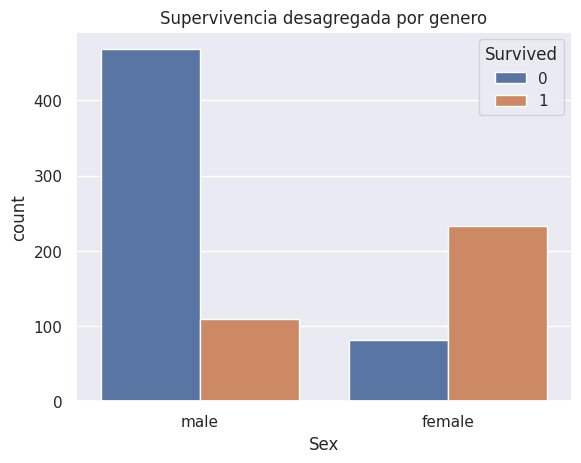

In [19]:
# Muestra, para cada sexo, cuántos sobrevivieron(1) y cuántos no (0).

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Supervivencia desagregada por genero')
plt.show()

### NOTAR QUE EN ESTE CASO NO HAY GRANDES DIFERENCIAS CON
# sns.countplot(x='survived', hue='sex', data=df)
### SALVO POR COMO QUEDAN ORDENADAS LAS VARIABLES

**Conclusiones**: Todo parece indicar que la probabilidad de supervivencia era mayor en las mujeres que en los hombres.

**Edad**: Acá la cosa se complica un poco porque la edad no toma dos valores, como en el género, sino muchos más. Entonces creamos una *máscara* de supervivencia.

In [21]:
# Convertir la columna "Survived" en booleanos

survived_bool = df.Survived.values.astype(bool)

### NOTA: .values pasa de un objeto de pandas a un arreglo de numpy
### OTRA OPCION:  survived_bool = df.survived.values == 1

Y separamos la variable edad en dos grupos, la edad de los que sobrevivieron y la edad de los que no. Luego, hacemos un histograma para cada uno y lo superponemos.

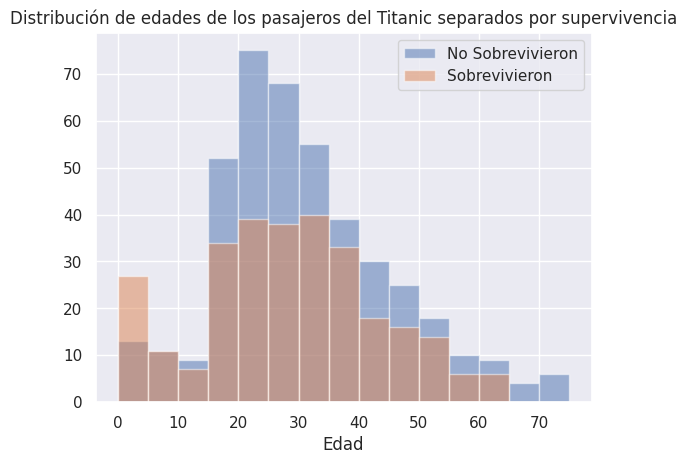

In [22]:
edad_survived = df.Age[survived_bool]
edad_not_survived = df.Age[~survived_bool]

edad_not_survived.hist(bins = np.arange(0,80,5),label = 'No Sobrevivieron', alpha = 0.5)
edad_survived.hist(bins = np.arange(0,80,5),label = 'Sobrevivieron', alpha = 0.5)

plt.title('Distribución de edades de los pasajeros del Titanic separados por supervivencia')
plt.xlabel('Edad')
plt.legend()
plt.show()

Otra forma de hacer un gráfico con la misma información es hacer un gráfico de la distribución de edades total (de la gente que sobrevivió y la que no juntas) y superponerle la distribución de la que sobrevivió. Por ahora, es una cuestión de gustos.

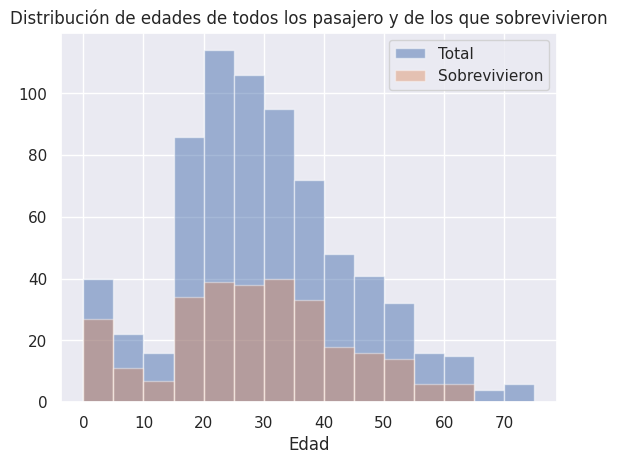

In [23]:
edad_survived = df.Age[survived_bool]
edad_not_survived = df.Age[~survived_bool]

df.Age.hist(bins = np.arange(0,80,5),label = 'Total', alpha = 0.5)
edad_survived.hist(bins = np.arange(0,80,5),label = 'Sobrevivieron', alpha = 0.4)

plt.title('Distribución de edades de todos los pasajero y de los que sobrevivieron')
plt.xlabel('Edad')
plt.legend()
plt.show()

**Conclusiones parciales**: en todos los rangos de edades (bines del histograma) la cantidad de gente que sobrevivió es menor que la que no, salvo en los dos primeros (0-5 y 5-10). Esto podría indicar que la probabilidad de supervivencia, siendo niño/niña, era mayor que siendo adolescente, adulto, etc. Sin embargo, podría suceder que en esos rangos de edades haya habido, por alguna razón, muchas más mujeres que hombres o que simplemente haya sido una cuestión de azar. Tratemos de analizar un poco más el dataset y ver si podemos echar luz sobre ese aspecto.

En primer lugar, separamos la distribucíon de edades por género.

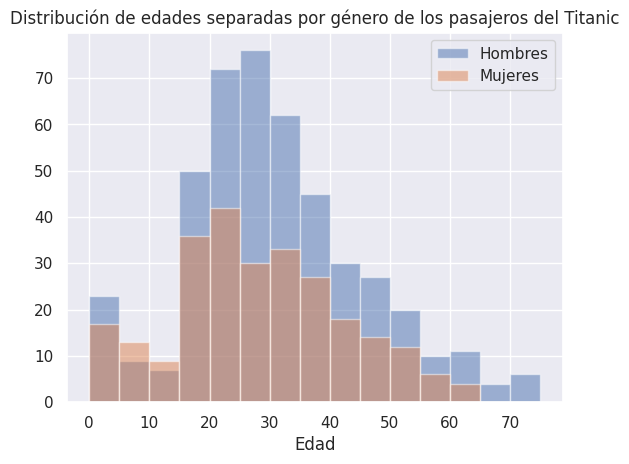

In [24]:
edad_hombres = df.Age[df.Sex == 'male']
edad_mujeres = df.Age[df.Sex == 'female']

edad_hombres.hist(bins = np.arange(0,80,5),label = 'Hombres', alpha = 0.5)
edad_mujeres.hist(bins = np.arange(0,80,5),label = 'Mujeres', alpha = 0.5)

plt.title('Distribución de edades separadas por género de los pasajeros del Titanic')
plt.xlabel('Edad')
plt.legend()
plt.show()

Hasta casi los 20 años la diferencia de cantidad entre hombres y mujeres es muy poca. Lo segundo que podemos hacer es separar, dentro de la gente que sobrevivió, el histograma por género. ¿Para qué hacemos eso? Si tenemos evidencia de que las mujeres tenían mayor probabilidad de supervivencia que los hombres, tal vez esta tendencia no sea tan clara en los rangos etarios más bajos. Esto se va a entender mejor una vez que tengamos el gráfico hecho.

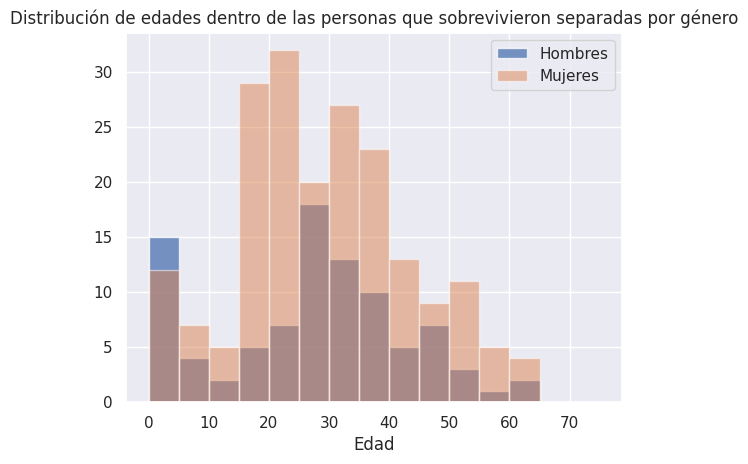

In [25]:
edad_survived = df.Age[survived_bool]

edad_survived[df.Sex == 'male'].hist(bins = np.arange(0,80,5),label = 'Hombres', alpha = 0.75)
edad_survived[df.Sex == 'female'].hist(bins = np.arange(0,80,5),label = 'Mujeres', alpha = 0.5)

plt.title('Distribución de edades dentro de las personas que sobrevivieron separadas por género')
plt.xlabel('Edad')
plt.legend()
plt.show()

Notar que en todos los rangos de edad sobrevivieron más mujeres que hombres, excepto en los dos primeros, donde sobrevivieron más niños que niñas.

**Conclusiones**:

1. Las mujeres tenían una mayor probabilidad de supervivencia. ¿Por qué? Porque si bien entre los pasajeros había más hombres que mujeres, dentro de los que sobrevivieron hay más mujeres que hombres, con una diferencia que parece ser *significativa*.
2. Los bebes y niños tenían una probabilidad de supervivencia más grande que el resto de los grupos etarios. Acá la cosa se complicó un poco, pero repasemos qué nos lleva a concluir eso:
    1. En todos los rangos de edades la cantidad de gente que sobrevivió es menor que la que no, salvo en el rango 0 - 12. Esto no se debe a que en ese rango de edades haya habido una mayoría de mujeres.
    2. Es el único rango de edades donde sobrevivieron más hombres que mujeres.



Las conclusiones de un análisis son siempre (bueno, casi siempre) parciales. Nuevos datos o datos no analizados pueden revertir una tendencia. ¿Qué aspectos no analizamos que podrían agregar información sobre la supervivencia de los pasajeros del Titanic?

## Extra: histogramas con frecuencias/porcentajes



A veces, en lugar de números absolutos (cuentas) nos interesa la frecuencia o porcentaje de un evento.


### Histogramas

Los histogramas pueden ser *normalizados*. Lamentablemente, la sintaxis no es tan sencilla. La idea para el gráfico que sigue es que le damos un peso (*weight*) a cada muestra. Notar que los pesos suman 1 (uno). Así, la altura de todas las barritas en el histograma no suman la cantidad de muestras, sino 1.

**Nota:** recordar que un porcentaje es una fracción. Por lo que 50% es lo mismo que decir 0.5, 33%: 0.33, etc.


In [26]:
weights=np.ones_like(df.Age.values[~np.isnan(df.Age.values)])/len(df.Age.values[~np.isnan(df.Age.values)])
print(weights.sum())

1.0


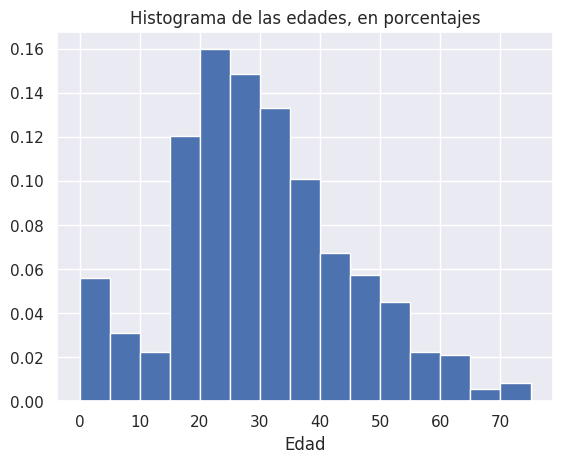

In [27]:
df.Age.hist(bins = np.arange(0,80,5), weights=weights)
plt.title('Histograma de las edades, en porcentajes')
plt.xlabel('Edad')
plt.show()